In [15]:
import cv2
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader
#from torch.autograd import Variable
from tqdm import tqdm
#from libs.service_defs import *
#import torch.autograd as autograd
#from scipy import stats
from torch.utils.tensorboard import SummaryWriter

from typing import Tuple, List, Type, Dict, Any

In [213]:
class DS(Dataset):
    def __init__(self, img_dict: str = '', mask=False):
        
        self.dict = np.loadtxt(fname=img_dict, usecols=0, dtype=str)
        self.transforms = torchvision.transforms.Compose([
                        torchvision.transforms.ToTensor()
                        ])
        self.mask = mask
        self.img_shape = (256, 256)
    
    def get_mask(self) :
        
        mask_id = np.random.randint(low=0, high=4000)
        mask_fname = './mask/mask_dataset/' + str(mask_id).zfill(5) + '.png'
        mask = cv2.imread(mask_fname, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, self.img_shape, interpolation=cv2.INTER_LINEAR)
        mask = mask / 255.0
        return mask

    def __getitem__(self, index):
        
        img_src = self.dict[index]
        img = cv2.imread(img_src)
        if self.mask :
            mask = self.get_mask()
            mask = np.resize(mask, (256, 256, 1))
            mask = np.repeat(mask, 3, axis=2)
            img = img * (np.ones_like(mask) - mask) + mask * np.ones_like(mask)
        img = self.transforms(img)
        img = img.unsqueeze(0)
        return img

    def __len__(self):
        return len(self.dict)

In [106]:
dataset = DS(img_dict='dict.txt', mask=False)

In [107]:
dataset[0].shape

torch.Size([1, 3, 256, 256])

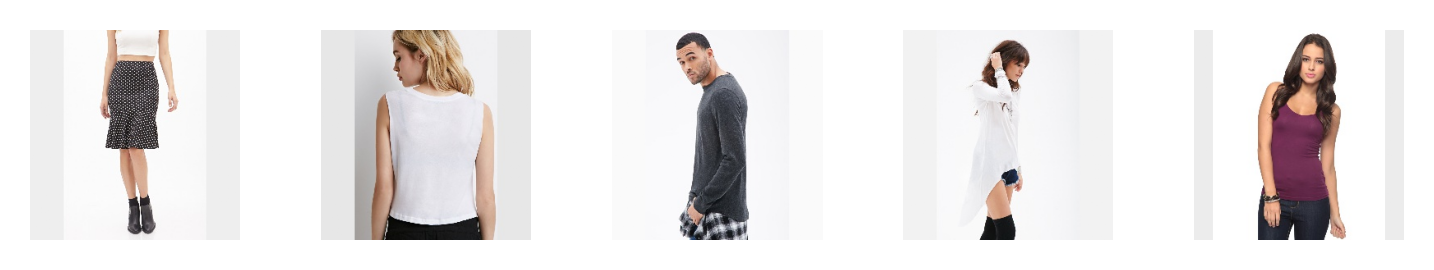

In [108]:
indices = np.random.randint(0, len(dataset), size=5)
samples = [dataset[idx] for idx in indices]
fig = plt.figure(figsize=(5, 1), dpi=300)
for idx,sample in enumerate(samples):
    sample_np = sample.squeeze(0).permute(1,2,0).numpy()
    p = plt.subplot(1,5,idx+1)
    plt.imshow(sample_np[...,::-1])
    plt.axis('off')
    
plt.tight_layout()
fig.patch.set_facecolor('white')

In [215]:
dataset_corrupted = DS(img_dict='dict.txt', mask=True)

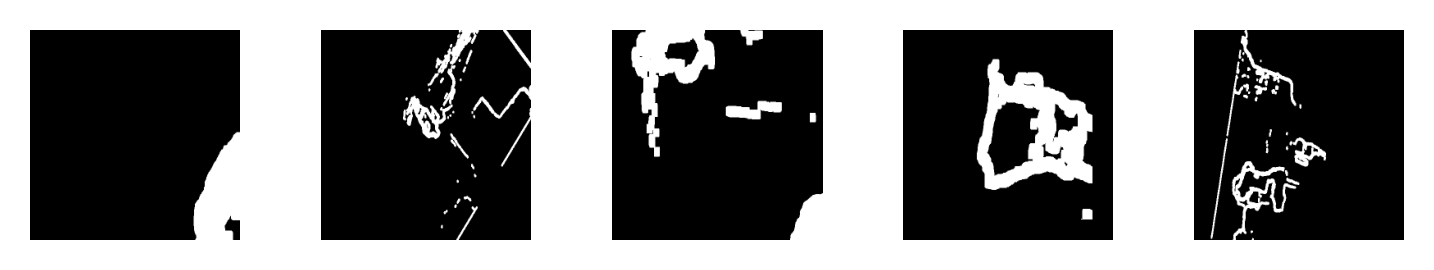

In [195]:
mask_examples = []
for _ in range(5) : 
    mask_examples.append(dataset_corrupted.get_mask())
fig = plt.figure(figsize=(5, 1), dpi=300)
for idx,mask_ex in enumerate(mask_examples):
    p = plt.subplot(1,5,idx+1)
    plt.imshow(mask_ex)
    plt.axis('off')
    
plt.tight_layout()
fig.patch.set_facecolor('white')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


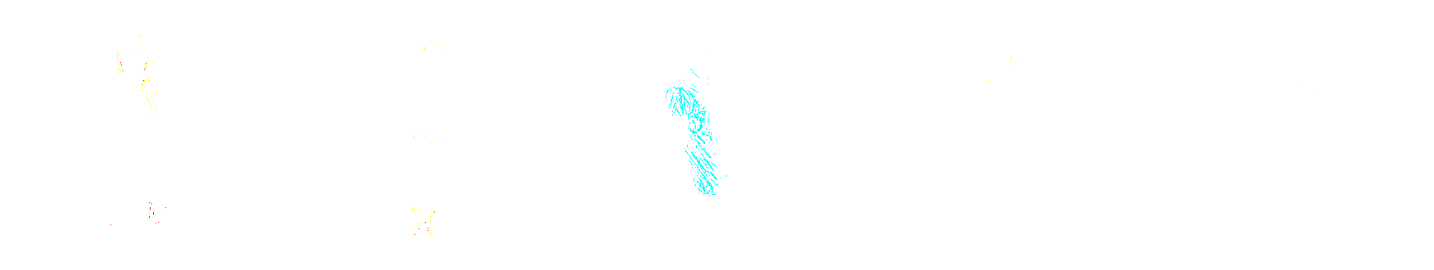

In [216]:
indices = np.random.randint(0, len(dataset_corrupted), size=5)
samples_corrupted = [dataset_corrupted[idx] for idx in indices]
fig = plt.figure(figsize=(5, 1), dpi=300)
for idx,sample_cor in enumerate(samples_corrupted):
    sample_cor_np = sample_cor.squeeze(0).permute(1,2,0).numpy()
    p = plt.subplot(1,5,idx+1)
    plt.imshow(sample_cor_np[...,::-1])
    plt.axis('off')
    
plt.tight_layout()
fig.patch.set_facecolor('white')